In [9]:
%pylab inline

import networkx as nx
import scipy.sparse
from sklearn.datasets import make_sparse_spd_matrix

import regain; reload(regain)
from regain.datasets import is_pos_def, is_pos_semidef
from regain.datasets import generate_ma_xue_zou
from regain.plot import plot_graph_with_latent_variables

Populating the interactive namespace from numpy and matplotlib


In [6]:
data_list, Kobs, Ks, Ls = datasets.generate_dataset_fede(n_dim_obs=12, eps=1e-1)

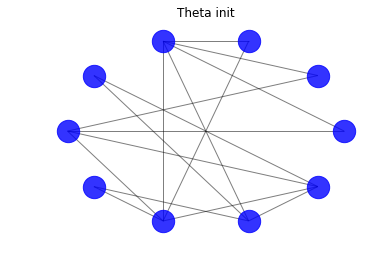

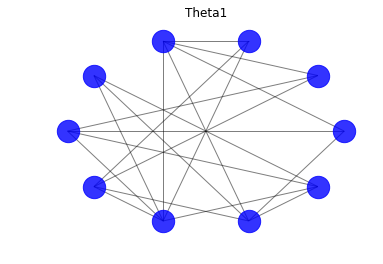

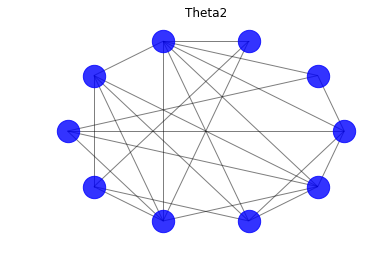

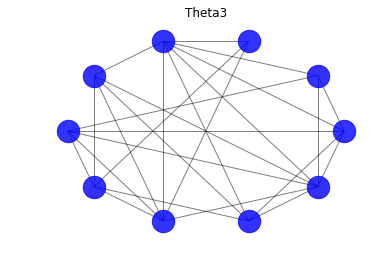

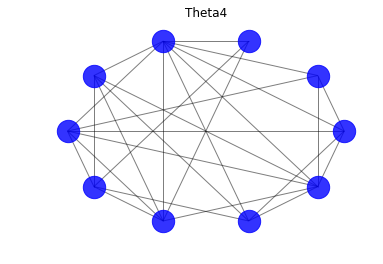

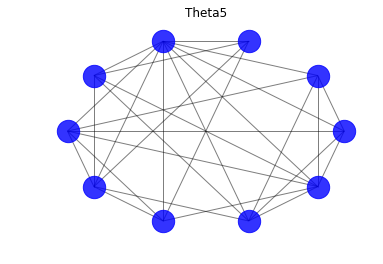

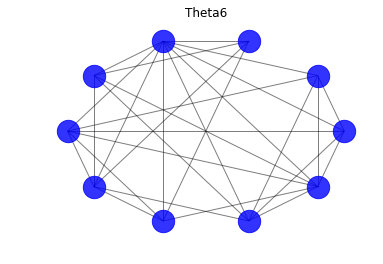

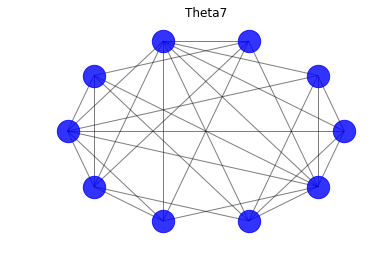

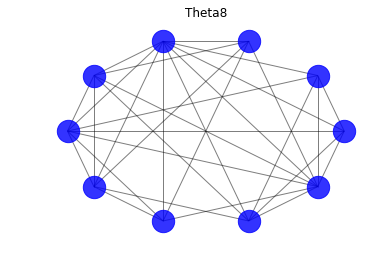

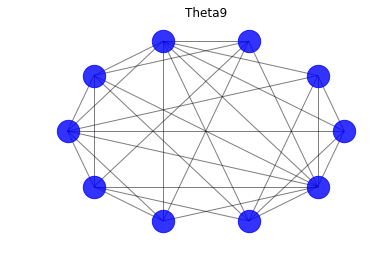

In [13]:
reload(datasets)
thetas, thetas_obs, ells = datasets.generate_dataset()

In [7]:
from regain.admm import latent_time_graph_lasso_, time_graph_lasso_; reload(time_graph_lasso_)
K, L, S = latent_time_graph_lasso_.time_latent_graph_lasso(data_list, verbose=1)
# K, S = time_graph_lasso_.time_graph_lasso(data_list, verbose=1)

obj: 4979.4694, rnorm: 9.0606, snorm: 16.8871,eps_pri: 0.1742, eps_dual: 0.0960
obj: 4982.7916, rnorm: 4.3878, snorm: 4.2548,eps_pri: 0.1886, eps_dual: 0.1350
obj: 4983.7804, rnorm: 3.5541, snorm: 3.2330,eps_pri: 0.2046, eps_dual: 0.1575
obj: 4986.6948, rnorm: 3.3627, snorm: 2.7723,eps_pri: 0.2181, eps_dual: 0.1794
obj: 4991.7074, rnorm: 3.2125, snorm: 2.5326,eps_pri: 0.2310, eps_dual: 0.2016
obj: 4997.6813, rnorm: 3.2470, snorm: 2.1651,eps_pri: 0.2465, eps_dual: 0.2226
obj: 5004.2004, rnorm: 3.4263, snorm: 1.6529,eps_pri: 0.2619, eps_dual: 0.2427
obj: 5020.0000, rnorm: 3.4837, snorm: 1.3266,eps_pri: 0.2722, eps_dual: 0.2623
obj: 5041.8486, rnorm: 2.9785, snorm: 1.2677,eps_pri: 0.2748, eps_dual: 0.2787
obj: 5061.2553, rnorm: 2.1620, snorm: 1.2492,eps_pri: 0.2716, eps_dual: 0.2909
obj: 5078.9016, rnorm: 1.5602, snorm: 1.1384,eps_pri: 0.2670, eps_dual: 0.3001
obj: 5090.6029, rnorm: 1.2810, snorm: 0.9040,eps_pri: 0.2642, eps_dual: 0.3073
obj: 5097.5383, rnorm: 1.1971, snorm: 0.6278,eps_pr

ValueError: too many values to unpack

In [8]:
reload(latent_time_graph_lasso_)
lt = latent_time_graph_lasso_.LatentTimeGraphLasso(verbose=True, assume_centered=False, rtol=1e-2,
                                                   max_iter=500).fit(np.array(data_list))

obj: 4979.4694, rnorm: 9.0606, snorm: 16.8871,eps_pri: 0.1742, eps_dual: 0.0960
obj: 4982.7916, rnorm: 4.3878, snorm: 4.2548,eps_pri: 0.1886, eps_dual: 0.1350
obj: 4983.7804, rnorm: 3.5541, snorm: 3.2330,eps_pri: 0.2046, eps_dual: 0.1575
obj: 4986.6948, rnorm: 3.3627, snorm: 2.7723,eps_pri: 0.2181, eps_dual: 0.1794
obj: 4991.7074, rnorm: 3.2125, snorm: 2.5326,eps_pri: 0.2310, eps_dual: 0.2016
obj: 4997.6813, rnorm: 3.2470, snorm: 2.1651,eps_pri: 0.2465, eps_dual: 0.2226
obj: 5004.2004, rnorm: 3.4263, snorm: 1.6529,eps_pri: 0.2619, eps_dual: 0.2427
obj: 5020.0000, rnorm: 3.4837, snorm: 1.3266,eps_pri: 0.2722, eps_dual: 0.2623
obj: 5041.8486, rnorm: 2.9785, snorm: 1.2677,eps_pri: 0.2748, eps_dual: 0.2787
obj: 5061.2553, rnorm: 2.1620, snorm: 1.2492,eps_pri: 0.2716, eps_dual: 0.2909
obj: 5078.9016, rnorm: 1.5602, snorm: 1.1384,eps_pri: 0.2670, eps_dual: 0.3001
obj: 5090.6029, rnorm: 1.2810, snorm: 0.9040,eps_pri: 0.2642, eps_dual: 0.3073
obj: 5097.5383, rnorm: 1.1971, snorm: 0.6278,eps_pr

In [69]:
lt.n_iter_

28

In [33]:
K[np.abs(K) < 1e-1] = 0

In [34]:
Kcopy = K.copy()
Kcopy[:, np.arange(K.shape[1]), np.arange(K.shape[1])] = 0
Kscopy = np.array(Ks).copy()
Kscopy[:, np.arange(K.shape[1]), np.arange(K.shape[1])] = 0

np.linalg.norm(np.array(Kscopy) - Kcopy) / Kcopy.shape[0]

0.59605588545272103

In [35]:
Kcopy = np.array(Kcopy)

In [37]:
# equal structure at each timestamp - nostro vs hallac
((Kcopy == 0).astype(int) + (Kscopy == 0).astype(int) == 1)[0].sum()

# low norm of difference, nostro vs hallac

# test score

# rank of L (nostro vs Chandrasekaran)

# degenerate case: with T = 1, perform equal to chandrasekaran

# comparison con chandrasekaran quando n e' grande o piccolo

52

In [48]:
np.linalg.matrix_rank(L[9])

12